In [1]:
#dataset cleaning

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from matplotlib import style
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [3]:
ML = pd.read_csv('/Users/manoj/desktop/WeatherData10years.csv')

In [4]:
ML.head(3)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.


In [5]:
ML = ML.rename(columns={"Formatted Date": "Formatted_Date", "Summary": "Forecast", "Precip Type": "Precipitation_Type", "Apparent Temperature (C)": "Apparent_Temperature(C)", "Temperature (C)": "Temperature(C)", "Wind Speed (km/h)": "Wind_Speed(km/h)", "Wind Bearing (degrees)": "Wind_Bearing(degrees)", "Visibility (km)": "Visibility(km)", "Pressure (millibars)":  "Pressure(millibars)", "Daily Summary": "Daily_Summary"})

In [6]:
ML.head(3)

,Formatted_Date,Forecast,Precipitation_Type,Temperature(C),Apparent_Temperature(C),Humidity,Wind_Speed(km/h),Wind_Bearing(degrees),Visibility(km),Loud Cover,Pressure(millibars),Daily_Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.


In [7]:
ML.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Formatted_Date           96453 non-null  object 
 1   Forecast                 96453 non-null  object 
 2   Precipitation_Type       95936 non-null  object 
 3   Temperature(C)           96453 non-null  float64
 4   Apparent_Temperature(C)  96453 non-null  float64
 5   Humidity                 96453 non-null  float64
 6   Wind_Speed(km/h)         96453 non-null  float64
 7   Wind_Bearing(degrees)    96453 non-null  float64
 8   Visibility(km)           96453 non-null  float64
 9   Loud Cover               96453 non-null  float64
 10  Pressure(millibars)      96453 non-null  float64
 11  Daily_Summary            96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [8]:
ML1 =pd.DataFrame(ML, columns = ['Formatted_Date', 'Forecast', 'Precipitation_Type', 'Temperature(C)', 'Apparent_Temperature(C)', 'Humidity', 'Wind_Speed(km/h)', 'Wind_Bearing(degrees)', 'Visibility(km)', 'Pressure(millibars)', 'Daily_Summary', 'Loud Cover'])
duplicate = ML1[ML1.duplicated()]
print("Duplicate Rows :")
duplicate

Duplicate Rows :


,Formatted_Date,Forecast,Precipitation_Type,Temperature(C),Apparent_Temperature(C),Humidity,Wind_Speed(km/h),Wind_Bearing(degrees),Visibility(km),Pressure(millibars),Daily_Summary,Loud Cover
36072,2010-08-02 00:00:00.000 +0200,Clear,rain,18.800000,18.800000,0.93,6.2790,270.0,14.9086,1016.99,Partly cloudy starting in the afternoon contin...,0.0
36073,2010-08-02 01:00:00.000 +0200,Clear,rain,18.222222,18.222222,0.97,6.2790,291.0,14.9086,1017.09,Partly cloudy starting in the afternoon contin...,0.0
36074,2010-08-02 02:00:00.000 +0200,Clear,rain,18.072222,18.072222,0.98,11.2700,290.0,6.8425,1013.23,Partly cloudy starting in the afternoon contin...,0.0
36075,2010-08-02 03:00:00.000 +0200,Clear,rain,16.622222,16.622222,0.99,6.4400,300.0,11.9784,1016.78,Partly cloudy starting in the afternoon contin...,0.0
36076,2010-08-02 04:00:00.000 +0200,Clear,rain,16.094444,16.094444,0.99,3.0751,280.0,11.9784,1016.67,Partly cloudy starting in the afternoon contin...,0.0
36077,2010-08-02 05:00:00.000 +0200,Clear,rain,15.955556,15.955556,0.99,3.8801,276.0,9.9820,1016.69,Partly cloudy starting in the afternoon contin...,0.0
36078,2010-08-02 06:00:00.000 +0200,Clear,rain,17.088889,17.088889,1.00,6.4400,310.0,9.9820,1017.08,Partly cloudy starting in the afternoon contin...,0.0
36079,2010-08-02 07:00:00.000 +0200,Clear,rain,20.822222,20.822222,0.87,3.2200,300.0,9.9820,1017.27,Partly cloudy starting in the afternoon contin...,0.0
36080,2010-08-02 08:00:00.000 +0200,Clear,rain,23.405556,23.405556,0.74,1.8837,334.0,9.9820,1017.27,Partly cloudy starting in the afternoon contin...,0.0
36081,2010-08-02 09:00:00.000 +0200,Clear,rain,26.050000,26.050000,0.59,1.5939,5.0,9.9820,1017.15,Partly cloudy starting in the afternoon contin...,0.0


In [9]:
ML2 = ML1.drop_duplicates()
print(ML2)

                      Formatted_Date       Forecast Precipitation_Type  \
0      2006-04-01 00:00:00.000 +0200  Partly Cloudy               rain   
1      2006-04-01 01:00:00.000 +0200  Partly Cloudy               rain   
2      2006-04-01 02:00:00.000 +0200  Mostly Cloudy               rain   
3      2006-04-01 03:00:00.000 +0200  Partly Cloudy               rain   
4      2006-04-01 04:00:00.000 +0200  Mostly Cloudy               rain   
...                              ...            ...                ...   
96448  2016-09-09 19:00:00.000 +0200  Partly Cloudy               rain   
96449  2016-09-09 20:00:00.000 +0200  Partly Cloudy               rain   
96450  2016-09-09 21:00:00.000 +0200  Partly Cloudy               rain   
96451  2016-09-09 22:00:00.000 +0200  Partly Cloudy               rain   
96452  2016-09-09 23:00:00.000 +0200  Partly Cloudy               rain   

       Temperature(C)  Apparent_Temperature(C)  Humidity  Wind_Speed(km/h)  \
0            9.472222            

In [10]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [11]:
ML2['Forecast']= label_encoder.fit_transform(ML2['Forecast'])

<ipython-input-11-b795a9b12a1e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ML2['Forecast']= label_encoder.fit_transform(ML2['Forecast'])


In [12]:
ML2['Forecast'].unique()

array([19, 17, 18, 12,  3,  6,  5,  4, 13, 15, 23, 25,  2, 26,  0, 11, 24,
        7,  9, 21, 14, 16,  8, 22, 10,  1, 20])

In [13]:
ML2.dtypes

Formatted_Date              object
Forecast                     int64
Precipitation_Type          object
Temperature(C)             float64
Apparent_Temperature(C)    float64
Humidity                   float64
Wind_Speed(km/h)           float64
Wind_Bearing(degrees)      float64
Visibility(km)             float64
Pressure(millibars)        float64
Daily_Summary               object
Loud Cover                 float64
dtype: object

In [14]:
ML3 = ML2.drop([0.  , 1.  ])

In [15]:
ML3.describe()

,Forecast,Temperature(C),Apparent_Temperature(C),Humidity,Wind_Speed(km/h),Wind_Bearing(degrees),Visibility(km),Pressure(millibars),Loud Cover
count,96427.000000,96427.000000,96427.000000,96427.000000,96427.000000,96427.000000,96427.000000,96427.000000,96427.0
mean,16.007508,11.929744,10.851781,0.734899,10.812390,187.496106,10.347112,1003.232663,0.0
std,4.359965,9.550584,10.695842,0.195467,6.913399,107.377095,4.192517,116.985500,0.0
min,0.000000,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,17.000000,4.680556,2.311111,0.600000,5.828200,116.000000,8.339800,1011.900000,0.0
50%,18.000000,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,1016.450000,0.0
75%,19.000000,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,1021.090000,0.0
max,26.000000,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,1046.380000,0.0


In [16]:
#Classification with eight attributes

In [17]:
#KNN Classifier

In [18]:
X = ML3.iloc[:, [3, 4, 5, 6, 7, 8, 9]]
y = ML3.iloc[:, 1]

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [20]:
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
knn = KNeighborsClassifier()
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [21]:
y_pred = knn.predict(X_test)

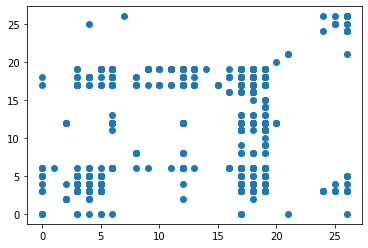

In [22]:
plt.scatter(y_test, y_pred)

In [23]:
from sklearn.preprocessing import StandardScaler 
st_x= StandardScaler()
st_x.fit_transform(X_test)

array([[-0.08093475,  0.02820313,  0.27663902, ...,  0.22696833,
        -0.0873114 ,  0.06536939],
       [-0.32312059, -0.18821638,  1.34663607, ..., -1.74838206,
        -1.37948528, -8.40590987],
       [ 1.58706944,  1.49902537, -1.76145061, ..., -0.2389162 ,
        -0.0873114 ,  0.09018259],
       ...,
       [-0.09893897,  0.01211439, -1.76145061, ...,  1.0469251 ,
         0.20583849,  0.08129678],
       [-1.53463059, -1.72235559,  0.58235246, ..., -0.34141079,
        -2.00435743, -8.40590987],
       [-0.43404984, -0.6013337 ,  0.12378229, ..., -0.45322308,
        -0.07188246,  0.16462221]])

In [24]:
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
knn = KNeighborsClassifier()
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_test, y_test)

KNeighborsClassifier(n_neighbors=3)

In [25]:
y_pred = knn.predict(X_test)

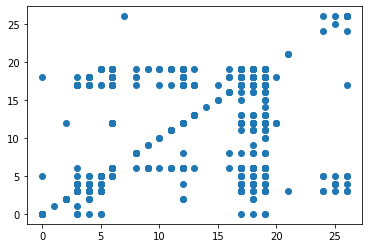

In [26]:
plt.scatter(y_test, y_pred)

In [27]:
print(("Test accuracy: ", knn.score(X_test, y_test)))
print(("Train accuracy: ", knn.score(X_train, y_train)))

('Test accuracy: ', 0.6774344083791352)
('Train accuracy: ', 0.4110135984755189)


In [28]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2*100,"%")

Confusion Matrix:
[[  12    0    0    0    0    1    0    0    0    0    0    0    0    0
     0    0    0    0    1    0    0    0    0    0    0]
 [   0    1    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    8    0    0    0    0    0    0    0    0    0    1    0
     0    0    0    0    0    0    0    0    0    0    0]
 [   3    1    0   74    7    1    1    0    0    0    0    0    0    0
     0    0    0    7    1    0    0    0    0    0    0]
 [   1    0    3   15   68    2    0    0    0    0    0    0    0    0
     0    0    0    4    6    0    0    0    0    0    0]
 [   2    0    0   14    4   52    0    0    0    0    0    0    0    0
     0    0    0    2    0    5    0    0    0    0    0]
 [   0    0    0    0    0    4 1591    0    0    0    0    0   26    0
     0    0    0  145   53  339    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0


/Users/manoj/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:
from sklearn.model_selection import cross_val_score
print(X_train.shape[0])
print (int(np.sqrt(X_train.shape[0])))
maxK = int(np.sqrt(X_train.shape[0]))
print(maxK)

77141
277
277


In [30]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

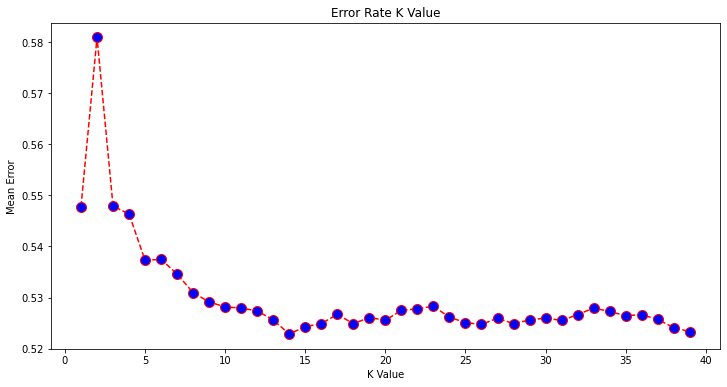

In [31]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error_rate, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [32]:
#SVM Classifier

In [33]:
X = ML3.iloc[:, [3, 4, 5, 6, 7, 8, 9]]
y = ML3.iloc[:, 1]

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [35]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(kernel='linear')

In [36]:
y_pred = svclassifier.predict(X_test)

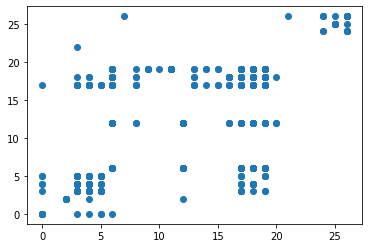

In [37]:
plt.scatter(y_test, y_pred)

In [38]:
from sklearn.preprocessing import MinMaxScaler 
st_x= MinMaxScaler()
st_x.fit_transform(X_test)

array([[0.62028717, 0.64942328, 0.96      , ..., 0.78551532, 0.62      ,
        0.96670426],
       [0.57647059, 0.60809158, 0.65      , ..., 0.6545961 , 0.966     ,
        0.96937059],
       [0.60213062, 0.6322964 , 0.55      , ..., 0.33426184, 0.7       ,
        0.97316462],
       ...,
       [0.37174618, 0.36368403, 0.88      , ..., 0.50417827, 0.744     ,
        0.97732181],
       [0.58425197, 0.61543167, 0.81      , ..., 0.10027855, 0.598     ,
        0.96883541],
       [0.46567855, 0.50358266, 0.96      , ..., 0.34261838, 0.128     ,
        0.97832527]])

In [39]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_test, y_test)

SVC(kernel='linear')

In [40]:
y_pred = knn.predict(X_test)

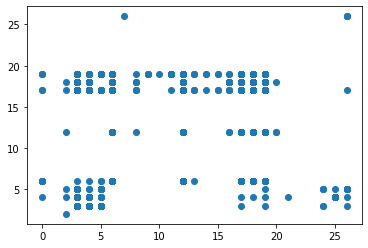

In [41]:
plt.scatter(y_test, y_pred)

In [42]:
print(("Test accuracy: ", knn.score(X_test, y_test)))
print(("Train accuracy: ", knn.score(X_train, y_train)))

('Test accuracy: ', 0.5110442808254693)
('Train accuracy: ', 0.50810852853865)


In [43]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2*100,"%")

Confusion Matrix:
[[   0    0    0    1    0    6    0    0    0    0    0    0    0    0
     0    0    2    0    3    0    0    0    0    0]
 [   0    1    0    1    1    0    0    0    0    0    0    1    0    0
     0    0    1    1    0    0    0    0    0    0]
 [   0    0   28   15   12    1    0    0    0    0    0    0    0    0
     0    0   28    8    8    0    0    0    0    0]
 [   0    0   12   36    2    1    0    0    0    0    0    0    0    0
     0    0   19   34    5    0    0    0    0    0]
 [   0    0   11    4   27    2    0    0    0    0    0    0    0    0
     0    0   10    0   14    0    0    0    0    0]
 [   0    0    0    0    0  389    0    0    0    0    0   92    0    0
     0    0  476  136 1088    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    1]
 [   0    0    0    0    0    0    0    0    0    0    0    1    0    0
     0    0    3    3    1    0    

/Users/manoj/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [44]:
# Random forest Classifier

In [45]:
X = ML3.iloc[:, [3, 4, 5, 6, 7, 8, 9]]
y = ML3.iloc[:, 1]

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [47]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)

RandomForestClassifier()

In [48]:
y_pred = clf.predict(X_test)

In [49]:
y_pred

array([18, 19, 17, ..., 19, 18, 17])

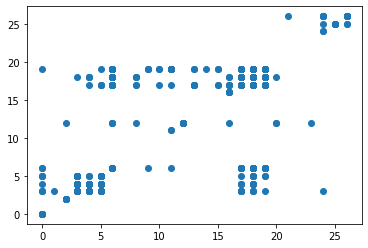

In [50]:
plt.scatter(y_test, y_pred)

In [51]:
from sklearn.preprocessing import MinMaxScaler 
st_x= MinMaxScaler()
st_x.fit_transform(X_test)

array([[0.60143043, 0.62662035, 0.79      , ..., 0.4178273 , 0.615     ,
        0.96979718],
       [0.67295189, 0.691858  , 0.68      , ..., 0.41504178, 1.        ,
        0.9703611 ],
       [0.6487089 , 0.66974498, 0.56      , ..., 0.1281337 , 0.644     ,
        0.96084147],
       ...,
       [0.345718  , 0.32839109, 0.92      , ..., 0.50417827, 0.62      ,
        0.97047579],
       [0.5526658 , 0.58214013, 0.72      , ..., 0.91922006, 0.62      ,
        0.96764667],
       [0.68168308, 0.69982208, 0.7       , ..., 0.16713092, 0.62      ,
        0.96549615]])

In [52]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_test,y_test)

RandomForestClassifier()

In [53]:
y_pred = knn.predict(X_test)

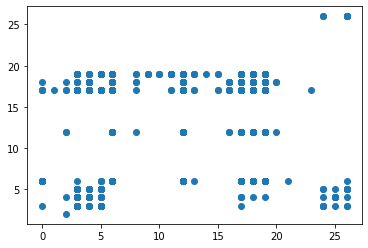

In [54]:
plt.scatter(y_test, y_pred)

In [55]:
print(("Test accuracy: ", clf.score(X_test, y_test)))
print(("Train accuracy: ", clf.score(X_train, y_train)))

('Test accuracy: ', 1.0)
('Train accuracy: ', 0.5457149894349308)


In [56]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2*100,"%")

Confusion Matrix:
[[   0    0    0    1    0    0   10    0    0    0    0    0    0    0
     0    0    4    1    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    1    0    0    0    0    0    0    0    0]
 [   0    0    1    0    1    0    0    0    0    0    0    2    0    0
     0    0    2    1    0    0    0    0    0    0    0]
 [   0    0    0   29   14   16    1    0    0    0    0    0    0    0
     0    0   21    3    7    0    0    0    0    0    0]
 [   0    0    0    4   41    6    0    0    0    0    0    0    0    0
     0    0   23   23    4    0    0    0    0    0    0]
 [   0    0    0   13    5   29    3    0    0    0    0    0    0    0
     0    0   16    0   19    0    0    0    0    0    0]
 [   0    0    0    0    0    0  390    0    0    0    0   74    0    0
     0    0  463  121 1147    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    1    0    0


/Users/manoj/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
